## Geospatial analysis


### Background of Challenge

There is a growing interest in the Nigerian health sector in recent years. Although the health sector
has seen advancement in their processes, there remains a gap in the use of spatial analysis in
providing locational insight which will enhance optimal resource allocation and service delivery.
In the region of Borno, the health system has suffered significant deterioration due to ongoing
conflict. Primary care services are inadequate, referrals are difficult to make, and hospitals are
overwhelmed with patients. As a result, the local population has limited access to healthcare
services.

Unfortunately, there is a scarcity of organizations addressing these urgent needs, leading to
significant gaps in essential health services. The overall situation in Borno highlights the urgent need
for comprehensive and improved healthcare intervention and optimized resource distribution.
You have been invited as a Geospatial Data Scientist intern to analyse the available datasets that can
guide a developmental agency in making the most suitable decisions for intervention to improve
access to healthcare for the people in the state. The agency would like to understand the
distribution of facilities that are in high-risk areas for mobilization of adequate security and the risk
profile of the different population groups due to inadequate access to healthcare.
Please note the following:

### Tool used for the analysis

The tool used for the analysis is Geopandas for Geospatial analysis

### What is the structure of the dataset?

There are four datasets provided: conflict, health facilities, population density and admin boundary. Which is used to extract and analyze the data that is specific to Borno State, and used for final analysis, visualization and story-telling.

In [220]:
# Load all importance packages
import geopandas
import numpy as np
import pandas as pd
import folium
from shapely.geometry import Point
import missingno as msn
import seaborn as sns
import matplotlib.pyplot as plt

% matplotlib inline

UsageError: Line magic function `%` not found.


In [108]:
# Getting to know GEO shapefile:
health_fac = geopandas.read_file("Nigeria-node.shp")
health_fac.head()

,osm_id,amenity,healthcare,name,operator,source,speciality,operator_t,contact_nu,operationa,...,water_sour,electricit,is_in_heal,url,addr_house,addr_stree,addr_postc,addr_city,changeset_,geometry
0,1611132419,pharmacy,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,xybot,POINT (7.57510 9.01089)
1,1754869254,pharmacy,None,Zuman Pharmacy,None,None,None,None,None,None,...,None,None,None,None,None,Maiduguri Road,None,None,MuhdLawal,POINT (7.43352 10.50774)
2,1754889379,pharmacy,pharmacy,Nasiru Dokta Chemist,None,None,None,None,None,operational,...,groundwater,grid,None,None,AZ 33,Daura Road,10B X,Dadi Riba,MuhdLawal,POINT (7.43351 10.50965)
3,1842624277,pharmacy,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,Andy Melnikov,POINT (6.60436 7.56117)
4,1880807484,pharmacy,None,Suleiko Pharmacy,None,None,None,None,None,None,...,None,None,None,None,12,Ahmadu Bello Way off Jos Road,None,None,MuhdLawal,POINT (7.43075 10.51406)


In [109]:
# Checking the type of the dataframe
type(health_fac)

geopandas.geodataframe.GeoDataFrame

Inference 

From the above we see that the dataframe is a GeoDataFrame class which is a specialized version of the pandas DataFrame that allows for the storage and manipulation of geospatial data, such as points, lines, and polygons, and provides methods for performing spatial operations and analysis

In [110]:
# checking the data geometry colunm
type(health_fac.geometry)

geopandas.geoseries.GeoSeries

### Data Cleaning


In [208]:
# getting the columns of the dataset
columns = list(health_fac.columns)
columns

['osm_id',
 'amenity',
 'healthcare',
 'name',
 'operator',
 'source',
 'speciality',
 'operator_t',
 'contact_nu',
 'operationa',
 'opening_ho',
 'beds',
 'staff_doct',
 'staff_nurs',
 'health_ame',
 'dispensing',
 'wheelchair',
 'emergency',
 'insurance',
 'water_sour',
 'electricit',
 'is_in_heal',
 'url',
 'addr_house',
 'addr_stree',
 'addr_postc',
 'addr_city',
 'changeset_',
 'geometry']

In [209]:
# examining missing values
print("Distribution of Missing Values: ")
print(health_fac.isnull().mean())
print("")

Distribution of Missing Values: 
osm_id        0.000000
amenity       0.032733
healthcare    0.708408
name          0.387087
operator      0.967267
source        0.299700
speciality    0.968769
operator_t    0.863363
contact_nu    0.997898
operationa    0.994294
opening_ho    0.988889
beds          0.995495
staff_doct    0.888288
staff_nurs    0.887387
health_ame    0.996096
dispensing    0.968769
wheelchair    0.994895
emergency     0.983183
insurance     0.993393
water_sour    0.995796
electricit    0.993393
is_in_heal    1.000000
url           0.999399
addr_house    0.976276
addr_stree    0.939339
addr_postc    0.985886
addr_city     0.935435
changeset_    0.000000
geometry      0.000000
dtype: float64



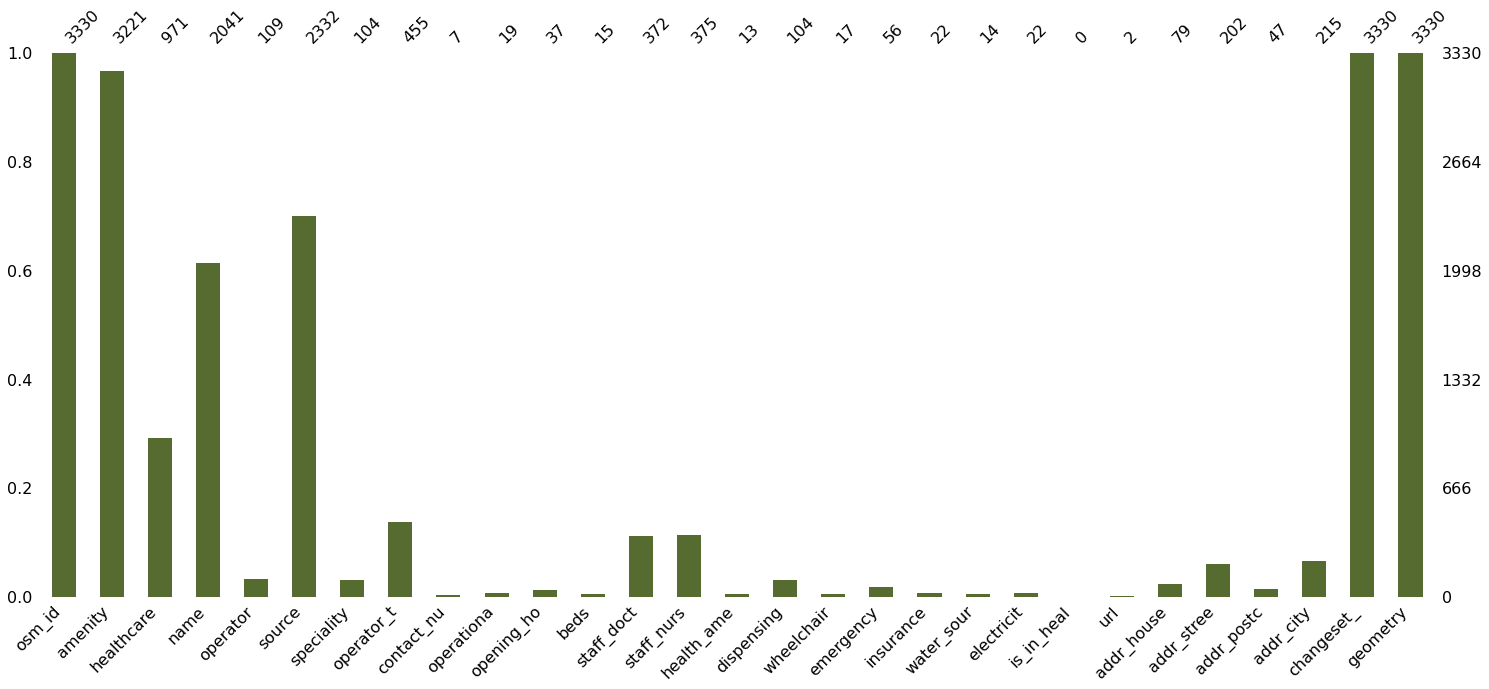

In [230]:
# visualization missing data
msn.bar(health_fac, color='darkolivegreen');

Inference

From the output, we can deduce that:

1. Almost all the data have missing values, although osm_id, geometry and changeset_ have no missing values. This could cause a lot of problems for analysis and plotting if not addressed and resolved. Fortunately, most other columns are not empty

2. There are columns with incorrect spelling, such as electricit. 

3. The datatype of the datasets are strings(object)

There are a few ways to deal with it:

Drop the column completely. If the column isn’t that important to our analysis.

Keep the column. If the columns are quite important to our analysis.

Imputation — the process of replacing missing data with substituted values. Here, it is not possible to do so because most of the data are string values and not numerical values. 

Hence, we would be keeping only column that is needed.

In [211]:
# getting all the columns with string/mixed type values
str_cols = list(health_fac.columns)
str_cols.remove('geometry')

# removing leading and trailing characters from columns with str type
for i in str_cols:
    health_fac[i] = health_fac[i].str.strip()

In [212]:
# data info
health_fac.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3330 entries, 0 to 3329
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   osm_id      3330 non-null   object  
 1   amenity     3221 non-null   object  
 2   healthcare  971 non-null    object  
 3   name        2041 non-null   object  
 4   operator    109 non-null    object  
 5   source      2332 non-null   object  
 6   speciality  104 non-null    object  
 7   operator_t  455 non-null    object  
 8   contact_nu  7 non-null      object  
 9   operationa  19 non-null     object  
 10  opening_ho  37 non-null     object  
 11  beds        15 non-null     object  
 12  staff_doct  372 non-null    object  
 13  staff_nurs  375 non-null    object  
 14  health_ame  13 non-null     object  
 15  dispensing  104 non-null    object  
 16  wheelchair  17 non-null     object  
 17  emergency   56 non-null     object  
 18  insurance   22 non-null     object  
 19

In [213]:
# selected data for analysis
data = health_fac.loc[:, ["amenity", "addr_city", "geometry"]].copy()

#### 1. How many amenity of each type of health facilities are there?

In [214]:
# counts for amenity of each type are there?
data.amenity.value_counts()

pharmacy                1376
doctors                  745
hospital                 660
clinic                   421
health_post               10
dentist                    7
refugee_site               1
alternative_medicine       1
Name: amenity, dtype: int64

In [279]:
# Grouping by year to see how many health_fac in the data set:
health_fac.groupby('addr_city').amenity.sum()

addr_city
ABUJA                                                                  hospital
Abuja                                                    hospitalhospitalclinic
Adeleye, Lalupon Road                                                    clinic
Badarawa                                                               hospital
Barnawa                                                                hospital
Dadi Riba                                                      pharmacyhospital
Federal Capital Territory                                                clinic
Festac Town                                                            hospital
Gombe                                                                  hospital
Guburunde                                                              hospital
Ibadab                                                                 hospital
Ibadan                                                 hospitalhospitalpharmacy
Igbeti                        

In [215]:
# Select amenity that fall under the "available_facilities" category
available_facilities = data.loc[data.amenity.isin(['pharmacy', 'hospital', 'clinic'])].copy()
available_facilities.head()

,amenity,addr_city,geometry
0,pharmacy,None,POINT (7.57510 9.01089)
1,pharmacy,None,POINT (7.43352 10.50774)
2,pharmacy,Dadi Riba,POINT (7.43351 10.50965)
3,pharmacy,None,POINT (6.60436 7.56117)
4,pharmacy,None,POINT (7.43075 10.51406)


<AxesSubplot:>

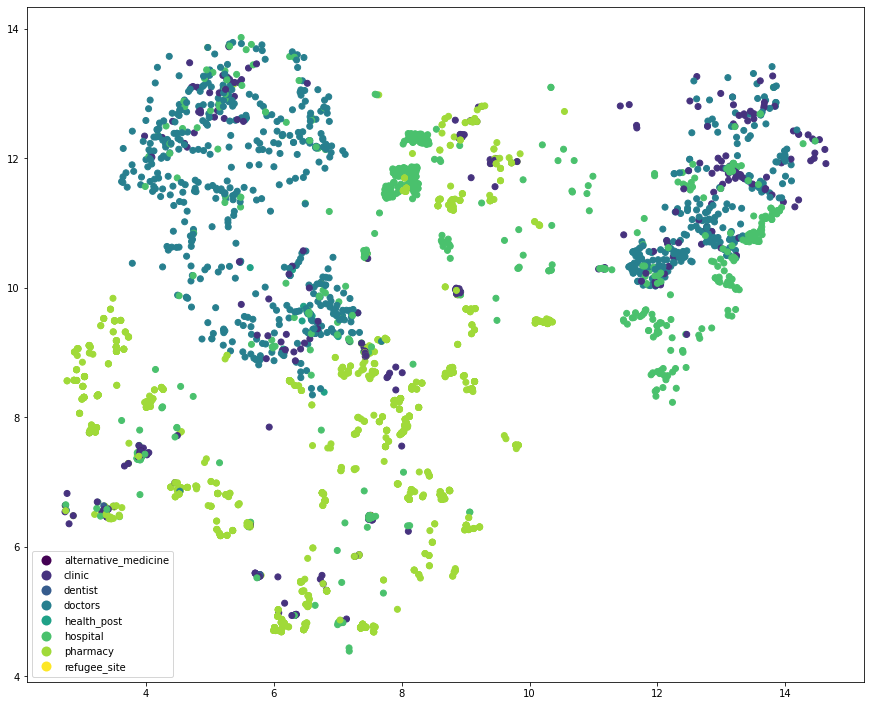

In [216]:
# visualizing the available facilities in Borno
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
data.plot(ax=ax, column='amenity', legend=True, cmap='viridis')

Inference

From the above, we see the value counts and visuals of each amenity available in the dataset. Here, we can assume amenity to the source of medication. We can say that pharmacy, doctors, hospital and clinic are more that health post, dentist, refugee site and alternative medicine.

<AxesSubplot:>

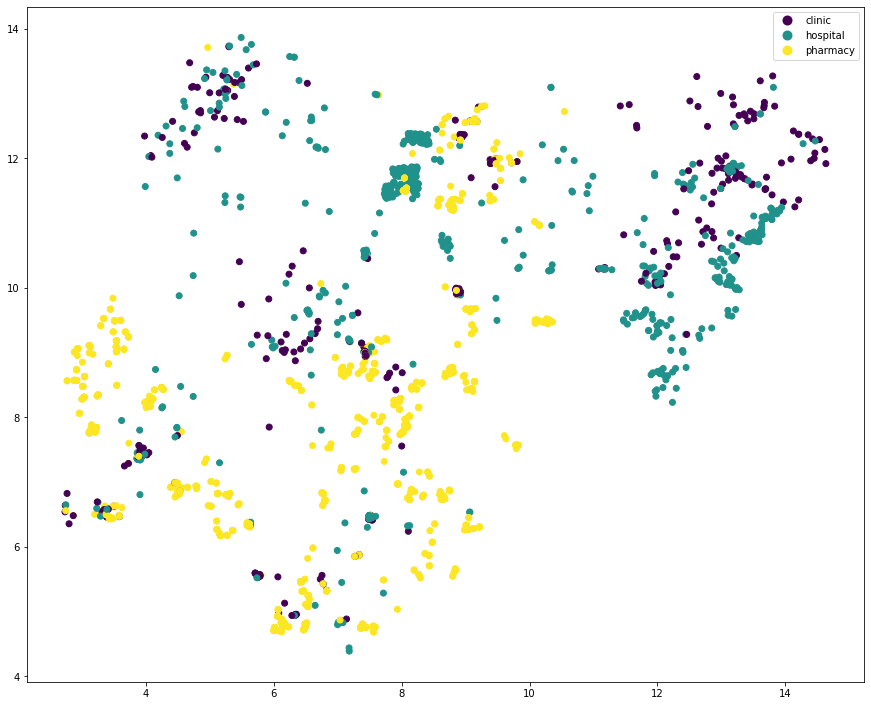

In [217]:
# visualizing the available facilities in Borno
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
available_facilities.plot(ax=ax, column='amenity', legend=True, cmap='viridis')

<AxesSubplot:>

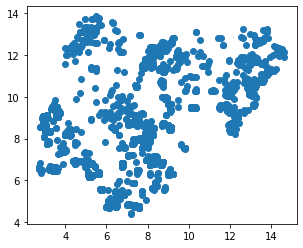

In [218]:
# visualizing the data 
available_facilities.plot()

In [219]:
# View the first five entries in the "geometry" column
available_facilities.geometry.head()

0     POINT (7.57510 9.01089)
1    POINT (7.43352 10.50774)
2    POINT (7.43351 10.50965)
3     POINT (6.60436 7.56117)
4    POINT (7.43075 10.51406)
Name: geometry, dtype: geometry

<AxesSubplot:>

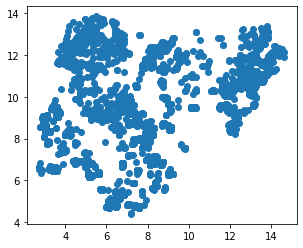

In [112]:
# plotting the dataset
health_fac.plot()

In [114]:
# checking name colunm
health_fac.name.head()

0                    None
1          Zuman Pharmacy
2    Nasiru Dokta Chemist
3                    None
4        Suleiko Pharmacy
Name: name, dtype: object

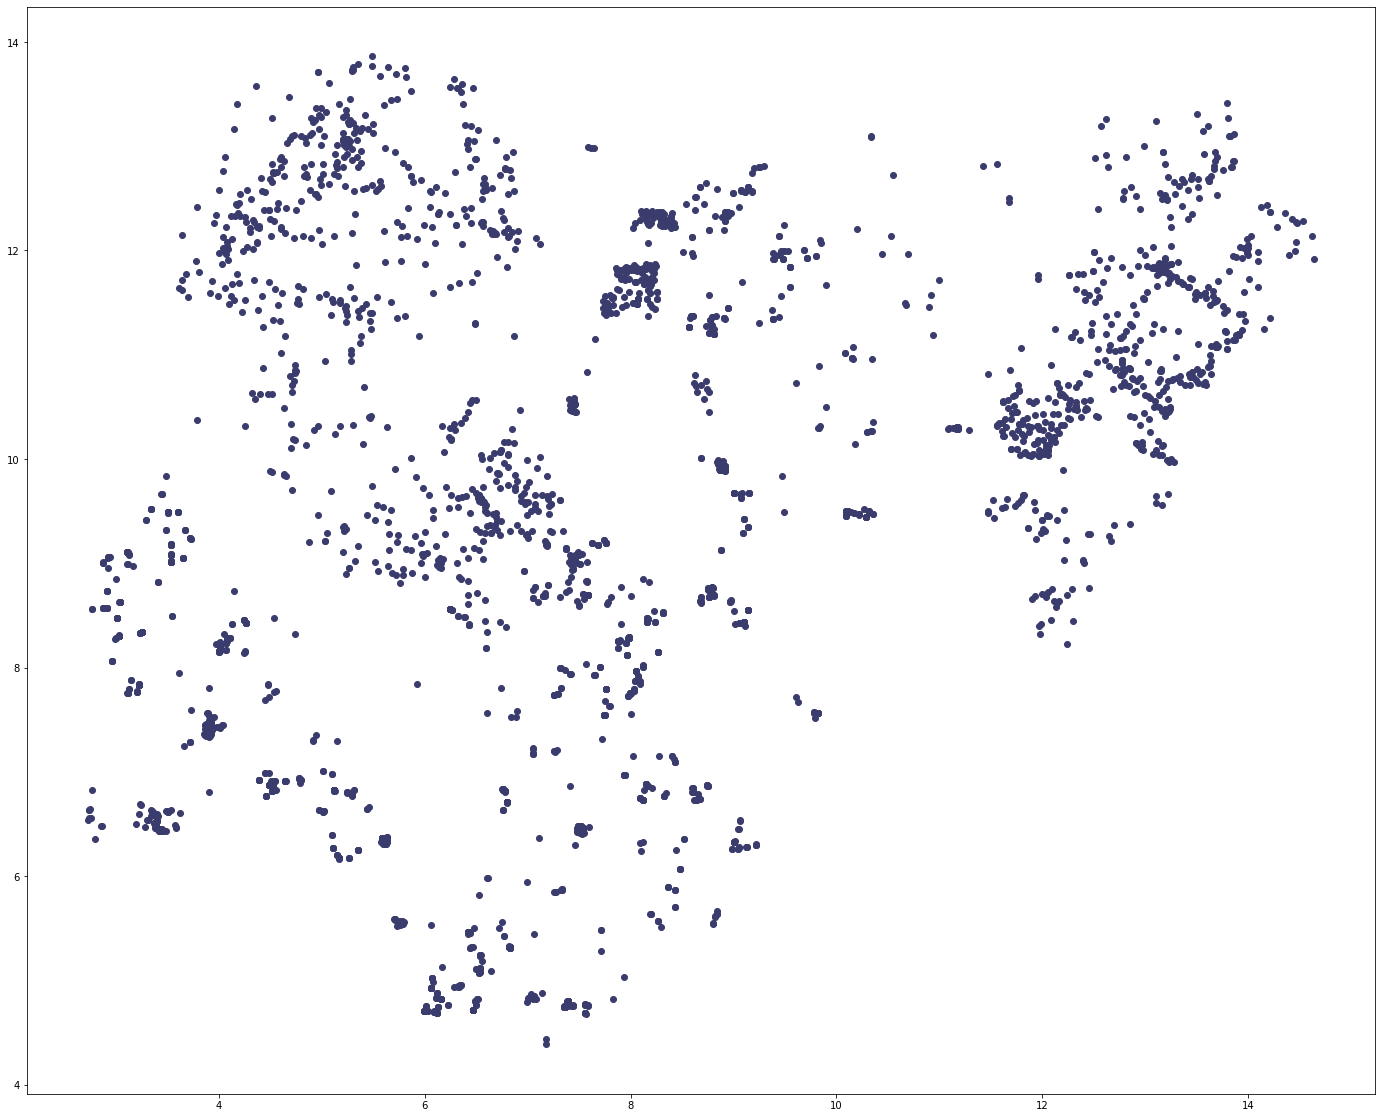

In [116]:
# Exclude None for now
health_fac[health_fac['name'].isin(['None','None']) == False].plot(figsize=(30,20), color='#3B3C6E');

#### Getting to know Pandas csvfile

In [117]:
# Getting to know Pandas csvfile:
conflict = pd.read_csv('Conflict_in_Western_Africa-Nigeria.csv')
conflict.head()

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
0,NIG29371,31 December 2022,2022,1,Political violence,Battles,Armed clash,Military Forces of Nigeria (2015-2023),Civilian JTF: Civilian Joint Task Force,1,...,Maiduguri,11.8312,13.1517,2,Twitter,New media,"On 31 December 2022, troops of the 199 Special...",6,NaN,1686096181
1,NIG29512,31 December 2022,2022,1,Political violence,Battles,Armed clash,Military Forces of Nigeria (2015-2023),NaN,1,...,Damboa,11.1560,12.7576,2,"Risk and Strategic Management, Corporation",Local partner-International,"On 31 December 2022, Troops of Operation HADIN...",6,NaN,1686096181
2,NIG29407,30 December 2022,2022,1,Political violence,Battles,Armed clash,Boko Haram - Jamaatu Ahli is-Sunnah lid-Dawati...,NaN,2,...,Abadam,13.6169,13.2644,2,Guardian (Nigeria); Sahara Reporters; Twitter,New media-National,"On 30 December 2022, a large number of Boko Ha...",30,NaN,1673311013
3,NIG29561,30 December 2022,2022,1,Political violence,Violence against civilians,Abduction/forced disappearance,Boko Haram - Jamaatu Ahli is-Sunnah lid-Dawati...,NaN,2,...,Konduga,11.6558,13.4213,2,Twitter,New media,"On 30 December 2022, Boko Haram [JAS] militant...",0,NaN,1673899227
4,NIG29349,27 December 2022,2022,1,Political violence,Explosions/Remote violence,Air/drone strike,Military Forces of Nigeria (2015-2023),NaN,1,...,Abbaram,11.6855,13.7607,2,Daily Leadership (Nigeria); Daily Post (Nigeri...,New media-National,"On 27 December 2022, the Nigerian Air Force ca...",28,NaN,1686096181


### Exploratory Data Analysis


We would:

1. Check the information, data type

2. Check any missing value

3. Statistical data

4. Remove unnecessary or redundant columns from a dataset

In [121]:
# summary of the health_fac DataFrame
conflict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   event_id_cnty       777 non-null    object 
 1   event_date          777 non-null    object 
 2   year                777 non-null    int64  
 3   time_precision      777 non-null    int64  
 4   disorder_type       777 non-null    object 
 5   event_type          777 non-null    object 
 6   sub_event_type      777 non-null    object 
 7   actor1              777 non-null    object 
 8   assoc_actor_1       63 non-null     object 
 9   inter1              777 non-null    int64  
 10  actor2              772 non-null    object 
 11  assoc_actor_2       123 non-null    object 
 12  inter2              777 non-null    int64  
 13  interaction         777 non-null    int64  
 14  civilian_targeting  214 non-null    object 
 15  iso                 777 non-null    int64  
 16  region  

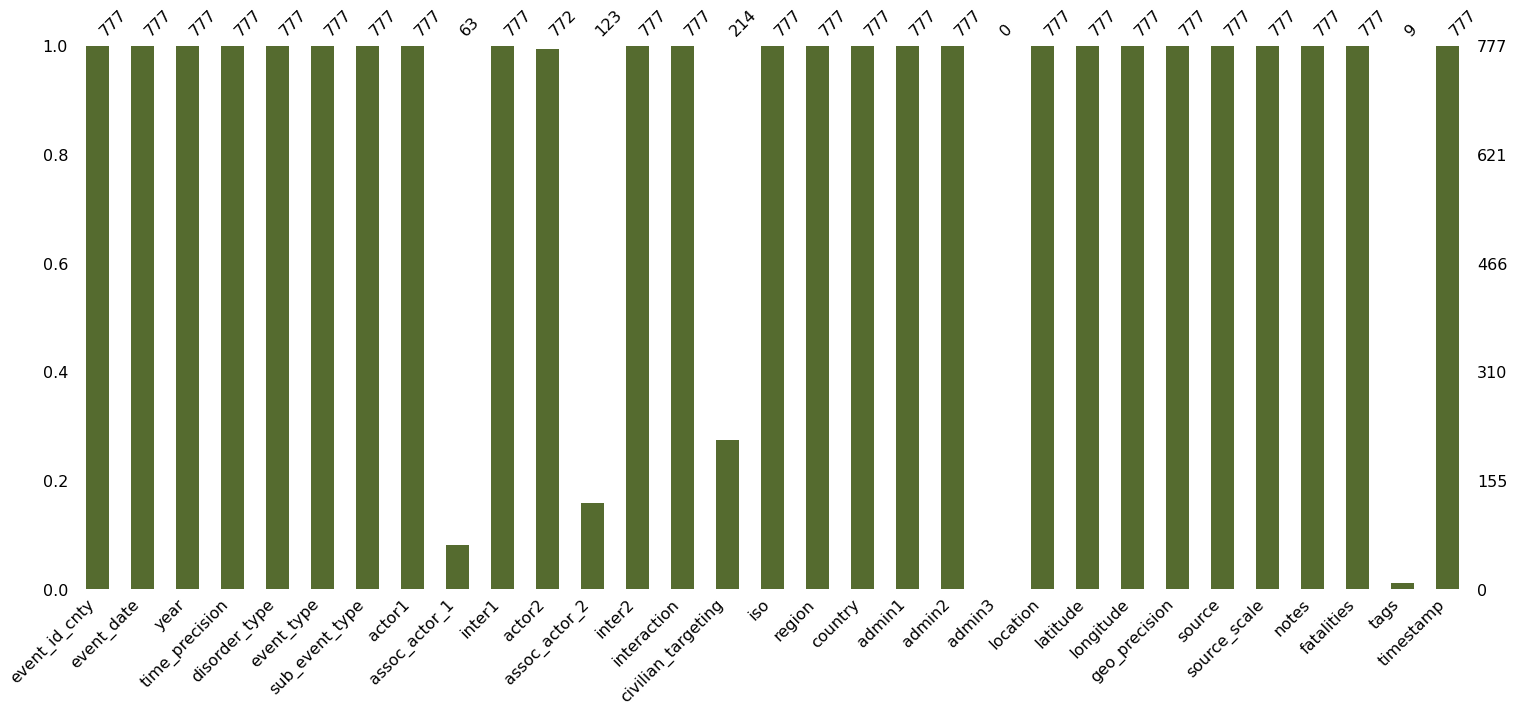

In [122]:
# visualization missing data
msn.bar(conflict, color='darkolivegreen');

Inference 

From bar chart visualization, it is shown that assoc_actor_1, assoc_actor_2, civilian_targeting, admin3, and tags variables have a significant number of missing values.

In [124]:
# Statistical information
conflict.describe()

,year,time_precision,inter1,inter2,interaction,iso,admin3,latitude,longitude,geo_precision,fatalities,timestamp
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.0,0.0,777.000000,777.000000,777.000000,777.000000,7.770000e+02
mean,2021.102960,1.148005,1.799228,3.208494,17.644788,566.0,NaN,11.751592,13.074510,1.568855,6.097812,1.671550e+09
std,0.862867,0.366052,1.073749,2.450075,6.981009,0.0,NaN,0.806007,1.345358,0.533137,13.420373,2.222022e+07
min,2020.000000,1.000000,1.000000,0.000000,12.000000,566.0,NaN,7.133800,4.509400,1.000000,0.000000,1.617065e+09
25%,2020.000000,1.000000,1.000000,2.000000,12.000000,566.0,NaN,11.250000,12.827400,1.000000,0.000000,1.666025e+09
50%,2021.000000,1.000000,2.000000,2.000000,12.000000,566.0,NaN,11.703200,13.343400,2.000000,3.000000,1.686096e+09
75%,2022.000000,1.000000,2.000000,7.000000,27.000000,566.0,NaN,12.282900,13.692500,2.000000,7.000000,1.686096e+09
max,2022.000000,3.000000,8.000000,8.000000,28.000000,566.0,NaN,13.674600,14.472400,3.000000,200.000000,1.686096e+09


Inference 

From the statistical information, we have a summary that includes the count, mean, standard deviation, minimum, maximum, and quartile values for each column in the dataset.

We will need to clean up and take only what we need to work on. Here, we only need the timestamp, the coordinates: latitude and longitude, fatalities, event_type, location, and name, but the rest could be dropped.

In [152]:
# dropping all unused features:
conflict = conflict.drop(['event_id_cnty', 'event_date', 'time_precision', 'tags', 'timestamp', 
                          'source_scale', 'source', 'geo_precision', 'admin1', 'admin2', 'admin3', 
                           'civilian_targeting', 'interaction', 'inter2', 'assoc_actor_2', 'actor2',
                            'actor1', 'inter1', 'assoc_actor_1'], axis=1)
conflict.head()

,year,disorder_type,event_type,sub_event_type,iso,region,country,location,latitude,longitude,notes,fatalities
0,2022,Political violence,Battles,Armed clash,566,Western Africa,Nigeria,Maiduguri,11.8312,13.1517,"On 31 December 2022, troops of the 199 Special...",6
1,2022,Political violence,Battles,Armed clash,566,Western Africa,Nigeria,Damboa,11.1560,12.7576,"On 31 December 2022, Troops of Operation HADIN...",6
2,2022,Political violence,Battles,Armed clash,566,Western Africa,Nigeria,Abadam,13.6169,13.2644,"On 30 December 2022, a large number of Boko Ha...",30
3,2022,Political violence,Violence against civilians,Abduction/forced disappearance,566,Western Africa,Nigeria,Konduga,11.6558,13.4213,"On 30 December 2022, Boko Haram [JAS] militant...",0
4,2022,Political violence,Explosions/Remote violence,Air/drone strike,566,Western Africa,Nigeria,Abbaram,11.6855,13.7607,"On 27 December 2022, the Nigerian Air Force ca...",28


In [155]:
# Add "-" in front of the number to correctly plot the data:
conflict['longitude'] = 0 - conflict['longitude']
conflict.head()

,year,disorder_type,event_type,sub_event_type,iso,region,country,location,latitude,longitude,notes,fatalities
0,2022,Political violence,Battles,Armed clash,566,Western Africa,Nigeria,Maiduguri,11.8312,-13.1517,"On 31 December 2022, troops of the 199 Special...",6
1,2022,Political violence,Battles,Armed clash,566,Western Africa,Nigeria,Damboa,11.1560,-12.7576,"On 31 December 2022, Troops of Operation HADIN...",6
2,2022,Political violence,Battles,Armed clash,566,Western Africa,Nigeria,Abadam,13.6169,-13.2644,"On 30 December 2022, a large number of Boko Ha...",30
3,2022,Political violence,Violence against civilians,Abduction/forced disappearance,566,Western Africa,Nigeria,Konduga,11.6558,-13.4213,"On 30 December 2022, Boko Haram [JAS] militant...",0
4,2022,Political violence,Explosions/Remote violence,Air/drone strike,566,Western Africa,Nigeria,Abbaram,11.6855,-13.7607,"On 27 December 2022, the Nigerian Air Force ca...",28


Inference

Adding "-" in front of the number longitude column. The purpose of this is to correctly plot the data on a map, as longitude values are typically represented as negative numbers in geographic coordinates. 
By multiplying the "Long" column by -1, the values become negative and can be plotted correctly on a map.

In [158]:
# Combining Lattitude and Longitude to create conflict coordinates:
conflict['coordinates'] = conflict[['longitude', 'latitude']].values.tolist()
conflict.head()


,year,disorder_type,event_type,sub_event_type,iso,region,country,location,latitude,longitude,notes,fatalities,coordinates
0,2022,Political violence,Battles,Armed clash,566,Western Africa,Nigeria,Maiduguri,11.8312,-13.1517,"On 31 December 2022, troops of the 199 Special...",6,"[-13.1517, 11.8312]"
1,2022,Political violence,Battles,Armed clash,566,Western Africa,Nigeria,Damboa,11.1560,-12.7576,"On 31 December 2022, Troops of Operation HADIN...",6,"[-12.7576, 11.156]"
2,2022,Political violence,Battles,Armed clash,566,Western Africa,Nigeria,Abadam,13.6169,-13.2644,"On 30 December 2022, a large number of Boko Ha...",30,"[-13.2644, 13.6169]"
3,2022,Political violence,Violence against civilians,Abduction/forced disappearance,566,Western Africa,Nigeria,Konduga,11.6558,-13.4213,"On 30 December 2022, Boko Haram [JAS] militant...",0,"[-13.4213, 11.6558]"
4,2022,Political violence,Explosions/Remote violence,Air/drone strike,566,Western Africa,Nigeria,Abbaram,11.6855,-13.7607,"On 27 December 2022, the Nigerian Air Force ca...",28,"[-13.7607, 11.6855]"


Inference

The above code combines the latitude and longitude columns of the conflict DataFrame to create a new column called "coordinates". The new column contains a list of the latitude and longitude values for each row in the DataFrame.

The new column is created by using the values.tolist() method to convert the latitude and longitude columns into a list and assigning it to the "coordinates" column.

In [159]:
# Change the coordinates to a geoPoint
conflict['coordinates'] = conflict['coordinates'].apply(Point)
conflict.head()

,year,disorder_type,event_type,sub_event_type,iso,region,country,location,latitude,longitude,notes,fatalities,coordinates
0,2022,Political violence,Battles,Armed clash,566,Western Africa,Nigeria,Maiduguri,11.8312,-13.1517,"On 31 December 2022, troops of the 199 Special...",6,POINT (-13.1517 11.8312)
1,2022,Political violence,Battles,Armed clash,566,Western Africa,Nigeria,Damboa,11.1560,-12.7576,"On 31 December 2022, Troops of Operation HADIN...",6,POINT (-12.7576 11.156)
2,2022,Political violence,Battles,Armed clash,566,Western Africa,Nigeria,Abadam,13.6169,-13.2644,"On 30 December 2022, a large number of Boko Ha...",30,POINT (-13.2644 13.6169)
3,2022,Political violence,Violence against civilians,Abduction/forced disappearance,566,Western Africa,Nigeria,Konduga,11.6558,-13.4213,"On 30 December 2022, Boko Haram [JAS] militant...",0,POINT (-13.4213 11.6558)
4,2022,Political violence,Explosions/Remote violence,Air/drone strike,566,Western Africa,Nigeria,Abbaram,11.6855,-13.7607,"On 27 December 2022, the Nigerian Air Force ca...",28,POINT (-13.7607 11.6855)


In [160]:
type(conflict)

pandas.core.frame.DataFrame

In [161]:
type(conflict['coordinates'])

pandas.core.series.Series

In [162]:
# Converting the count df to geodf
conflict = geopandas.GeoDataFrame(conflict, geometry='coordinates')
conflict.head()

,year,disorder_type,event_type,sub_event_type,iso,region,country,location,latitude,longitude,notes,fatalities,coordinates
0,2022,Political violence,Battles,Armed clash,566,Western Africa,Nigeria,Maiduguri,11.8312,-13.1517,"On 31 December 2022, troops of the 199 Special...",6,POINT (-13.15170 11.83120)
1,2022,Political violence,Battles,Armed clash,566,Western Africa,Nigeria,Damboa,11.1560,-12.7576,"On 31 December 2022, Troops of Operation HADIN...",6,POINT (-12.75760 11.15600)
2,2022,Political violence,Battles,Armed clash,566,Western Africa,Nigeria,Abadam,13.6169,-13.2644,"On 30 December 2022, a large number of Boko Ha...",30,POINT (-13.26440 13.61690)
3,2022,Political violence,Violence against civilians,Abduction/forced disappearance,566,Western Africa,Nigeria,Konduga,11.6558,-13.4213,"On 30 December 2022, Boko Haram [JAS] militant...",0,POINT (-13.42130 11.65580)
4,2022,Political violence,Explosions/Remote violence,Air/drone strike,566,Western Africa,Nigeria,Abbaram,11.6855,-13.7607,"On 27 December 2022, the Nigerian Air Force ca...",28,POINT (-13.76070 11.68550)


In [163]:
conflict.year.value_counts()

2022    333
2020    253
2021    191
Name: year, dtype: int64

In [164]:
# Filtering from 2022 conflict
conflict[conflict['year']== 2022]

,year,disorder_type,event_type,sub_event_type,iso,region,country,location,latitude,longitude,notes,fatalities,coordinates
0,2022,Political violence,Battles,Armed clash,566,Western Africa,Nigeria,Maiduguri,11.8312,-13.1517,"On 31 December 2022, troops of the 199 Special...",6,POINT (-13.15170 11.83120)
1,2022,Political violence,Battles,Armed clash,566,Western Africa,Nigeria,Damboa,11.1560,-12.7576,"On 31 December 2022, Troops of Operation HADIN...",6,POINT (-12.75760 11.15600)
2,2022,Political violence,Battles,Armed clash,566,Western Africa,Nigeria,Abadam,13.6169,-13.2644,"On 30 December 2022, a large number of Boko Ha...",30,POINT (-13.26440 13.61690)
3,2022,Political violence,Violence against civilians,Abduction/forced disappearance,566,Western Africa,Nigeria,Konduga,11.6558,-13.4213,"On 30 December 2022, Boko Haram [JAS] militant...",0,POINT (-13.42130 11.65580)
4,2022,Political violence,Explosions/Remote violence,Air/drone strike,566,Western Africa,Nigeria,Abbaram,11.6855,-13.7607,"On 27 December 2022, the Nigerian Air Force ca...",28,POINT (-13.76070 11.68550)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,2022,Political violence,Violence against civilians,Attack,566,Western Africa,Nigeria,Askira,10.6470,-12.9110,"On 6 January 2022, presumed ISWAP/Boko Haram a...",0,POINT (-12.91100 10.64700)
329,2022,Political violence,Violence against civilians,Attack,566,Western Africa,Nigeria,Madagali,10.8864,-13.6300,"Around 5 January 2022, suspected boko haram mi...",1,POINT (-13.63000 10.88640)
330,2022,Political violence,Battles,Armed clash,566,Western Africa,Nigeria,Gwoza,11.0840,-13.6925,"On 5 January 2022, Nigerian military forces an...",10,POINT (-13.69250 11.08400)
331,2022,Political violence,Battles,Armed clash,566,Western Africa,Nigeria,Kombi,11.0224,-12.7977,"On 3 January 2022, military forces clashed wit...",0,POINT (-12.79770 11.02240)


#### 2. What is the total number of fatalities in the dataset?

In [232]:
# summing to know total fatalities
conflict.fatalities.sum()

4738

Inference

From the above, we see that the total number of fatalities in the 3 years combined is 4,738


#### 3. How many fatalities occurred in each year? 

In [166]:
# Groupping by year to see how many fatalities it has in the data set:
conflict.groupby('year').fatalities.count()

year
2020    253
2021    191
2022    333
Name: fatalities, dtype: int64

Inference

Grouping by  year shows how many times each fatalities appears in the dataset. We see that in 2020 there was 253 fatalities, in 2021 there was 191 fatalities and in 2022 there was 333 which is the highest for all three years combined.

In [167]:
# column names
conflict.columns

Index(['year', 'disorder_type', 'event_type', 'sub_event_type', 'iso',
       'region', 'country', 'location', 'latitude', 'longitude', 'notes',
       'fatalities', 'coordinates'],
      dtype='object')

#### 4. What is the cause of each fatalities?

In [170]:
# Groupping by event_type to see the cause of each fatalities in the data set:
conflict.groupby('event_type').fatalities.count()

event_type
Battles                       450
Explosions/Remote violence    135
Strategic developments          2
Violence against civilians    190
Name: fatalities, dtype: int64

Inference

From the above, we see that the cause of fatalities is more from Battles, violence against civilians and Explosions/Remote violence than strategic developments.


In [264]:
# groupby location and checking the aggregates fatalities and event_type
con_loc = conflict.groupby('location').agg({'fatalities':'count', 'event_type':'sum'}).reset_index()
con_loc.head(20)

,location,fatalities,event_type
0,Abadam,8,BattlesExplosions/Remote violenceExplosions/Re...
1,Abbaram,1,Explosions/Remote violence
2,Agapalawa,1,Battles
3,Ajiri,4,BattlesBattlesExplosions/Remote violenceBattles
4,Alagarno,2,BattlesExplosions/Remote violence
5,Alau,1,Violence against civilians
6,Alawa,2,Violence against civiliansViolence against civ...
7,Aljari,1,Battles
8,Amdaga,1,Battles
9,Arege,2,BattlesBattles


In [236]:
# groupby location
conflict.groupby('location').agg({'fatalities':'count', 'event_type':'sum'}).reset_index()

,location,fatalities,event_type
0,Abadam,8,BattlesExplosions/Remote violenceExplosions/Re...
1,Abbaram,1,Explosions/Remote violence
2,Agapalawa,1,Battles
3,Ajiri,4,BattlesBattlesExplosions/Remote violenceBattles
4,Alagarno,2,BattlesExplosions/Remote violence
...,...,...,...
241,Wurge,3,Violence against civiliansBattlesBattles
242,Yale,2,BattlesExplosions/Remote violence
243,Yola,1,Battles
244,Zagzaga,1,Violence against civilians


### Visualization

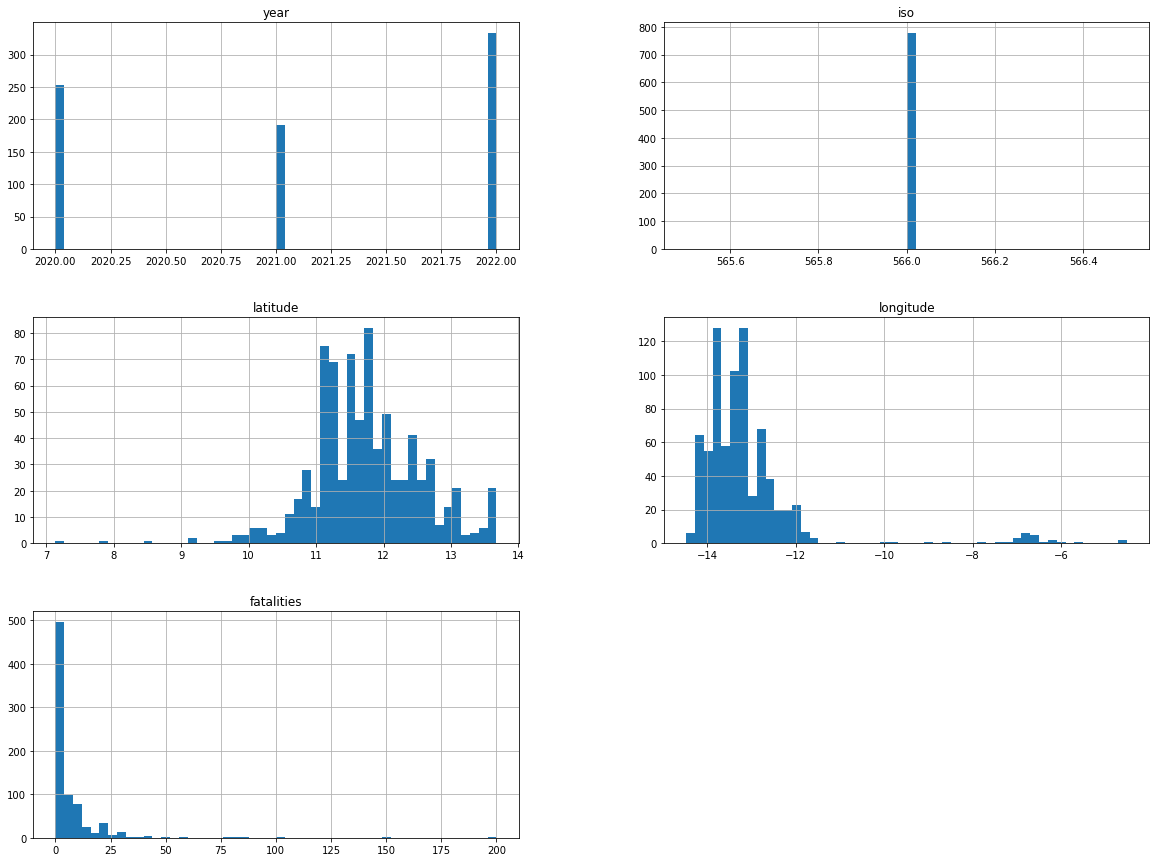

In [203]:
# plot histograms for each numeric feature
conflict.hist(bins=50, figsize=(20,15))
plt.show()

Inference

We can see the distribution of each of the variables independently.

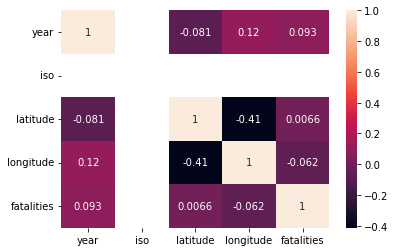

In [207]:
# Create a correlation matrix
cor_mat = conflict.corr()
# Plot the heatmap
sns.heatmap(cor_mat,annot=True)
plt.show()

Inference

From the Heatmap, we can get to know the correlation between the different variables.

In [206]:
import folium
# Create a map centered at the mean latitude and longitude
mean_latitude = conflict['latitude'].mean()
mean_longitude = conflict['longitude'].mean()
map_data = folium.Map(location=[mean_latitude, mean_longitude], zoom_start=5)
# Add a marker for each location
for index, row in data.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']],
                        radius=5,
                        color='red',
                        fill=True,
                        fill_color='red',
                        fill_opacity=0.7).add_to(map_data)
# Display the map
map_data

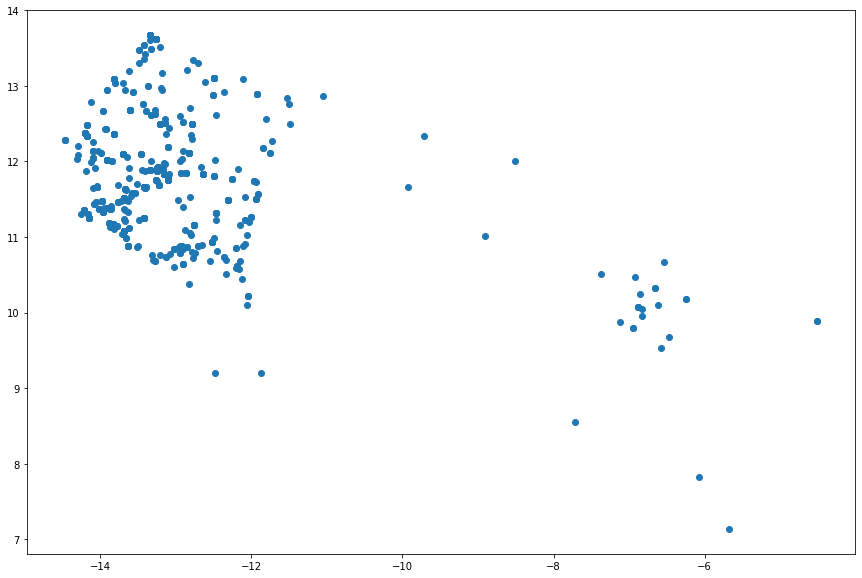

In [171]:
# creating a plot of the data stored in the conflict variable.
conflict.plot(figsize=(20,10));

#### 5. What is the distribution of health facilities that are in high-risk areas?

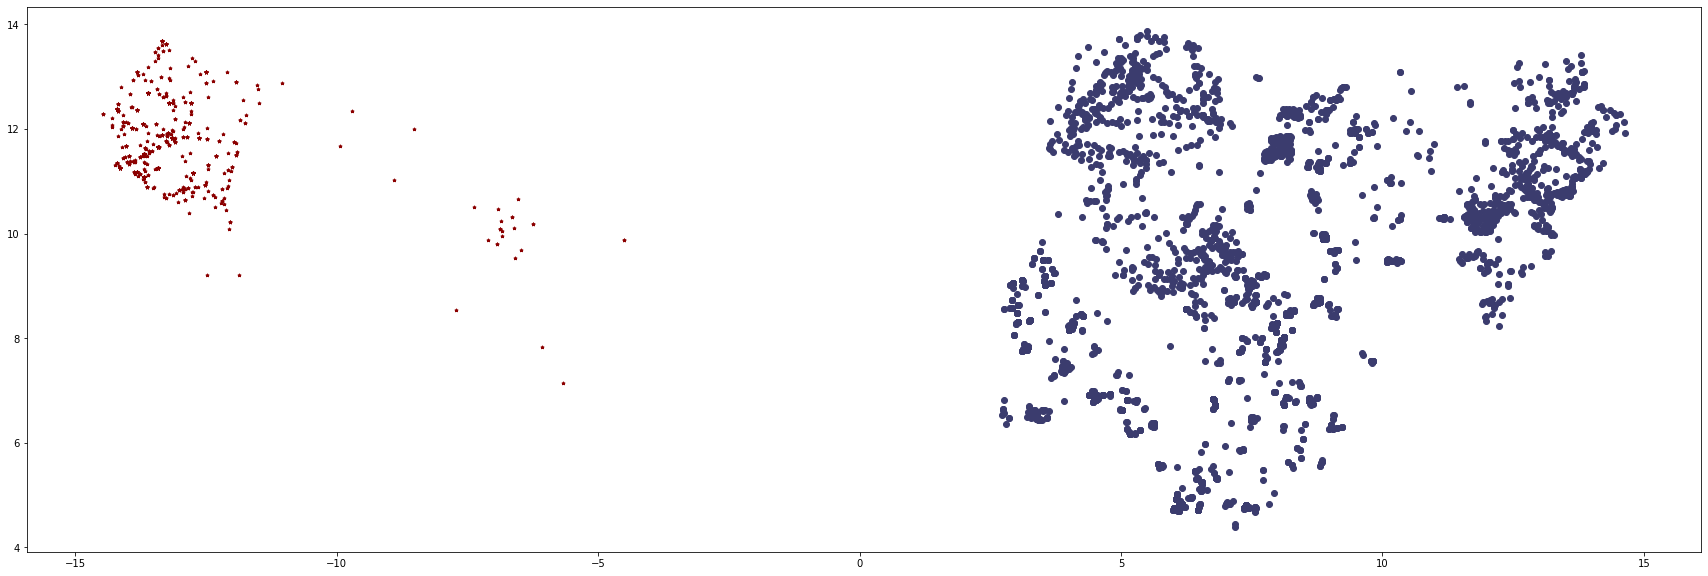

In [172]:
 # Plotting to see the conflict overlay the map:
fig, ax = plt.subplots(1, figsize=(30,20))
base = health_fac[health_fac['name'].isin(['None','None']) == False].plot(ax=ax, color='#3B3C6E')

# plotting the conflict position on top with red color to stand out:
conflict.plot(ax=base, color='darkred', marker="*", markersize=10);

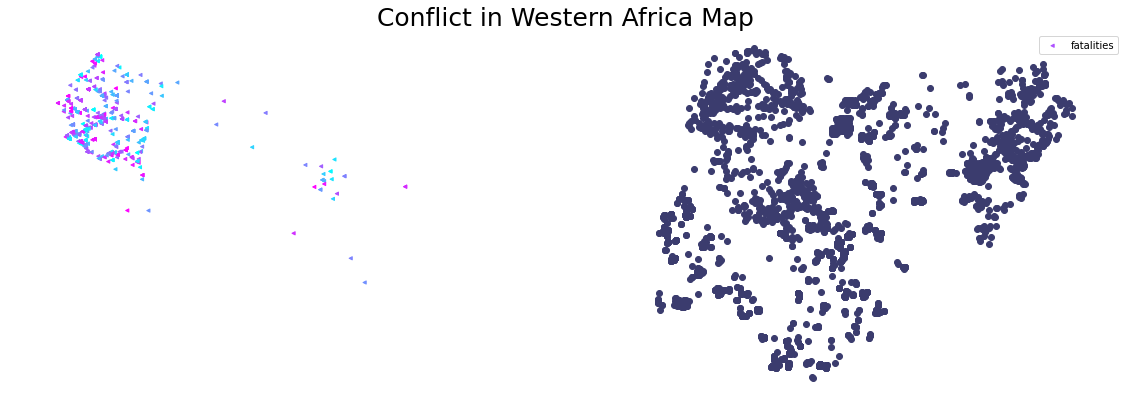

In [181]:
# creating a map of conflict in West Africa with location data.
fig, ax = plt.subplots(1, figsize=(20,20))
base = health_fac[health_fac['name'].isin(['None','None']) == False].plot(ax=ax, color='#3B3C6E')

conflict.plot(ax=base, column='location', marker="<", markersize=10, cmap='cool', label="fatalities")
_ = ax.axis('off')
plt.legend()
ax.set_title("Conflict in Western Africa Map", fontsize=25)
plt.savefig('Conflict.png',bbox_inches='tight');

Inference

From the above map, the location of health facilities considered to be high-risk areas are the marked points of fatalities distribution.

In [274]:
# Getting to know GEO shapefile:
boun_data = geopandas.read_file(r"Admin_1\NGA_cnty_admin1\nga_polbnda_adm1_1m_salb.shp")
boun_data.head()

,CNTRY_NAME,CNTRY_CODE,ADM1_NAME,ADM1_CODE,HRparent,Shape_Leng,Shape_Area,geometry
0,Nigeria,NGA,Abia,NGA001,NG001,4.544712,0.396427,"POLYGON ((7.40442 6.01240, 7.41584 6.00622, 7...."
1,Nigeria,NGA,Adamawa,NGA002,NG002,12.325359,3.129146,"POLYGON ((13.66988 10.94469, 13.68840 10.94465..."
2,Nigeria,NGA,Akwa lbom,NGA003,NG003,3.999998,0.549834,"MULTIPOLYGON (((8.33286 4.58996, 8.32003 4.588..."
3,Nigeria,NGA,Anambra,NGA004,NG004,3.472342,0.388930,"POLYGON ((6.93254 6.71090, 6.93167 6.69870, 6...."
4,Nigeria,NGA,Bauchi,NGA005,NG005,13.863192,3.983724,"POLYGON ((10.72652 12.43089, 10.72507 12.40556..."


In [283]:
boun_data.ADM1_NAME.head(10)

0           Abia
1        Adamawa
2      Akwa lbom
3        Anambra
4         Bauchi
5        Bayelsa
6          Benue
7          Borno
8    Cross River
9          Delta
Name: ADM1_NAME, dtype: object